# Tarea 2: Grupo 3
## Integrantes
20166498	LEÓN HUAMÁN, MARÍA LESLY

20180619	DAVILA VASQUEZ, MARIA PAULA

20181302	ZAVALA CASTILLO, ARIANNA NICKOLE

F1516944	MOLINA LEÓN, NICOLE CAMILA


## Regularización y Métodos de Ensamble
### Parte 1: Regularización para Predecir Precios de Viviendas
#### 0.1.1. Preparación de datos

In [1]:
# Librerias
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', message="Coordinate descent without L1 regularization may lead to unexpected results and is discouraged.")
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [2]:
# Basic
import numpy as np
import pandas as pd
from functools import partial

# Scikit-Learn
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Matplotlib
from matplotlib.pyplot import subplots

##### 0.1.1.a. Cargar el dataset

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/boston.csv')

##### 0.1.1.b. Explorar la base de datos

In [10]:
data.shape             
data.info()            
data.head()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [11]:
data = data.dropna()
data = data.drop(columns = ['Unnamed: 0'])
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


##### 0.1.1.c. Separar los datos en predictores (x) y variable objetivo (y, medv) 

In [12]:
Y = np.array(data['medv'])
X = data.drop(columns=['medv'])

##### 0.1.1.d. Divida los datos en un conjunto de entrenamiento (80 %) y un conjunto de prueba (20 %). Use un random state=42.

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##### 0.1.1.e. Estandarice las caracterısticas en X usando StandardScaler. Ajuste el escalador solo con los datos de entrenamiento y luego transforme ambos conjuntos.

In [15]:
scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test) 

#### 0.1.2. Implementación e Interpretación de Lasso y Ridge
##### 0.1.2.a. Lasso: Entrene un objeto LassoCV con 10 pliegues (cv=10) sobre los datos de entrenamiento para encontrar el lambda optimo. Imprima el valor encontrado y grafique.


In [17]:
# 1. Define CV strategy and scaler
K = 10
kfold = skm.KFold(K, random_state=0, shuffle=True)
scaler = StandardScaler(with_mean=True, with_std=True)

# 2. Define the LassoCV model and pipeline
lassoCV = skl.ElasticNetCV(n_alphas=100, l1_ratio=1, cv=kfold) #Model
pipeCV_lasso = Pipeline(steps=[('scaler', scaler), ('lasso', lassoCV)])

# 3. Fit the pipeline on the training data
pipeCV_lasso.fit(X_train, Y_train)

# Extract the tuned model
tuned_lasso = pipeCV_lasso.named_steps['lasso']

El mejor lambda (alpha) para Lasso es: 0.025842113756363888
El MSE de CV en el conjunto de entrenamiento es: 25.312340985374327


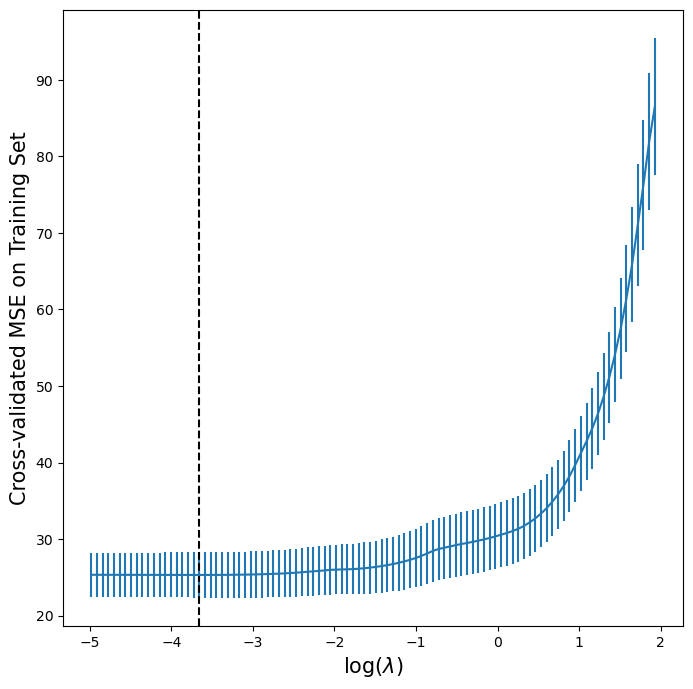

In [18]:
lassoCV_fig, ax = subplots(figsize=(8, 8))
ax.errorbar(np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel(r'$\log(\lambda)$', fontsize=15)
ax.set_ylabel('Cross-validated MSE on Training Set', fontsize=15)

# Print the optimal lambda
best_lambda_lasso = tuned_lasso.alpha_
print(f"El mejor lambda (alpha) para Lasso es: {best_lambda_lasso}")
print(f"El MSE de CV en el conjunto de entrenamiento es: {np.min(tuned_lasso.mse_path_.mean(1))}")

##### 0.1.2.b. Muestre los coeficientes del mejor modelo Lasso. En este dataset, ¿Lasso elimino alguna variable (establecio su coeficiente en cero)? Basado en los coeficientes no nulos, ¿cuales parecen ser los predictores mas importantes segun el modelo?

In [20]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
Y_pred = pipeCV_lasso.predict(X_test)

# Calculate the Mean Squared Error on the test set
test_mse = mean_squared_error(Y_test, Y_pred)

print(f"El Mean Squared Error (MSE) final en el conjunto de prueba es: {test_mse:.2f}")

El Mean Squared Error (MSE) final en el conjunto de prueba es: 23.02


In [21]:
lasso_final_coefs = tuned_lasso.coef_
lasso_final_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso_final_coefs})
lasso_final_df = lasso_final_df.sort_values(by='Coefficient', ascending=False)

# Display only variables with non-zero coefficients
print("Variables seleccionadas por Lasso (coeficiente no nulo):")
display(lasso_final_df[lasso_final_df['Coefficient'] != 0])

Variables seleccionadas por Lasso (coeficiente no nulo):


,Variable,Coefficient
5,rm,3.029596
8,rad,1.619588
3,chas,0.785733
1,zn,0.589211
6,age,-0.045283
0,crim,-1.052130
9,tax,-1.440458
10,ptratio,-1.949367
4,nox,-1.989313
7,dis,-2.927227


##### En este dataset, ¿Lasso elimino alguna variable (establecio su coeficiente en cero)?

In [22]:
num_vars_totales = X.shape[1]
num_vars_no_cero = sum(tuned_lasso.coef_ != 0)
num_vars_cero = sum(tuned_lasso.coef_ == 0)

print(f"Total variables: {num_vars_totales}")
print(f"Variables con coeficiente ≠ 0: {num_vars_no_cero}")
print(f"Variables eliminadas (coeficiente = 0): {num_vars_cero}")

Total variables: 12
Variables con coeficiente ≠ 0: 11
Variables eliminadas (coeficiente = 0): 1


Lasso eliminó 1 variable

##### Basado en los coeficientes no nulos, ¿cuales parecen ser los predictores mas importantes segun el modelo?

Entre las variables retenidas, los predictores más influyentes sobre el valor medio de las viviendas (medv) son:
- RM (average number of rooms per dwelling): presenta un coeficiente positivo, lo que sugiere que a mayor número promedio de habitaciones, mayor es el valor de la vivienda.
- LSTAT (% lower status of the population): presenta un coeficiente negativo, indicando que un mayor porcentaje de población de bajo estatus socioeconómico se asocia con menores valores de vivienda.